In [1]:
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns
from glob import glob

In [2]:
file_list = glob("./data/*")
file_list

['./data\\conversionRates.csv',
 './data\\freeformResponses.csv',
 './data\\multipleChoiceResponses.csv',
 './data\\RespondentTypeREADME.txt',
 './data\\schema.csv']

In [3]:
mcq = pd.read_csv(file_list[4])
mcq.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 290 entries, 0 to 289
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Column    290 non-null    object
 1   Question  290 non-null    object
 2   Asked     290 non-null    object
dtypes: object(3)
memory usage: 6.9+ KB


In [4]:
mcq.head()

,Column,Question,Asked
0,GenderSelect,Select your gender identity. - Selected Choice,All
1,GenderFreeForm,Select your gender identity. - A different ide...,All
2,Country,Select the country you currently live in.,All
3,Age,What's your age?,All
4,EmploymentStatus,What's your current employment status?,All


In [5]:
mca = pd.read_csv(file_list[2], encoding="cp437", low_memory=False)
mca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16716 entries, 0 to 16715
Columns: 228 entries, GenderSelect to JobFactorPublishingOpportunity
dtypes: float64(13), object(215)
memory usage: 29.1+ MB


In [6]:
mca.head()

,GenderSelect,Country,Age,EmploymentStatus,StudentStatus,LearningDataScience,CodeWriter,CareerSwitcher,CurrentJobTitleSelect,TitleFit,...,JobFactorExperienceLevel,JobFactorDepartment,JobFactorTitle,JobFactorCompanyFunding,JobFactorImpact,JobFactorRemote,JobFactorIndustry,JobFactorLeaderReputation,JobFactorDiversity,JobFactorPublishingOpportunity
0,"Non-binary, genderqueer, or gender non-conforming",NaN,NaN,Employed full-time,NaN,NaN,Yes,NaN,DBA/Database Engineer,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Female,United States,30.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Somewhat important,NaN,NaN
2,Male,Canada,28.0,"Not employed, but looking for work",NaN,NaN,NaN,NaN,NaN,NaN,...,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important,Very Important
3,Male,United States,56.0,"Independent contractor, freelancer, or self-em...",NaN,NaN,Yes,NaN,Operations Research Practitioner,Poorly,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Male,Taiwan,38.0,Employed full-time,NaN,NaN,Yes,NaN,Computer Scientist,Fine,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
mcq[mcq["Column"] == "LanguageRecommendationSelect"]

,Column,Question,Asked
18,LanguageRecommendationSelect,What programming language would you recommend ...,All


In [8]:
mca.loc[:, mca.columns == "LanguageRecommendationSelect"].value_counts().head()

LanguageRecommendationSelect
Python                          6941
R                               2643
SQL                              385
C/C++/C#                         307
Matlab                           238
dtype: int64

In [9]:
mca["LanguageRecommendationSelect"].value_counts().index

Index(['Python', 'R', 'SQL', 'C/C++/C#', 'Matlab', 'Java', 'Scala', 'SAS',
       'Other', 'Julia', 'Stata', 'Haskell', 'F#'],
      dtype='object')

<Axes: xlabel='count', ylabel='LanguageRecommendationSelect'>

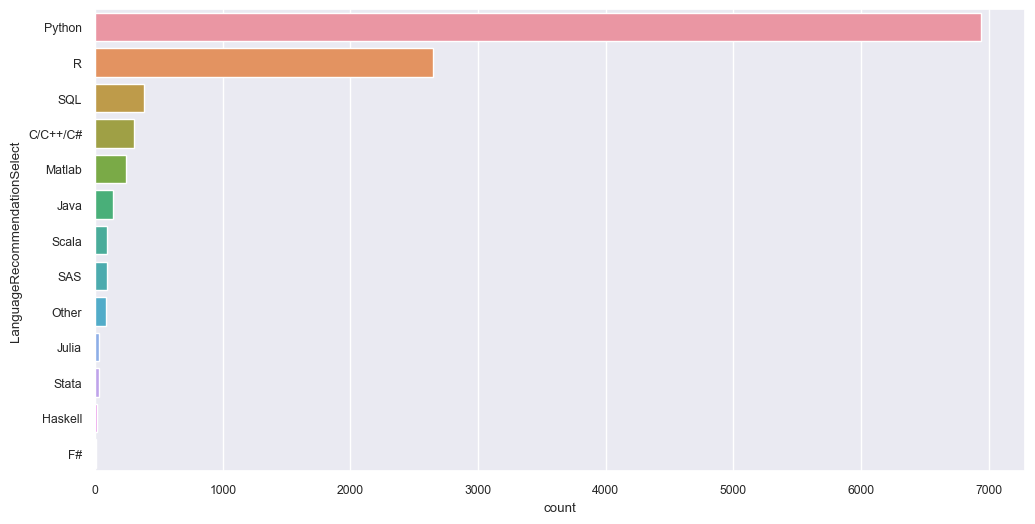

In [10]:
plt.figure(figsize=(12, 6))
sns.set(font_scale=0.8)
sns.countplot(mca, y="LanguageRecommendationSelect", order=mca["LanguageRecommendationSelect"].value_counts().index)

In [11]:
mca["CurrentJobTitleSelect"].value_counts().head()

Data Scientist                          2433
Software Developer/Software Engineer    1759
Other                                   1233
Data Analyst                            1213
Scientist/Researcher                     978
Name: CurrentJobTitleSelect, dtype: int64

<Axes: xlabel='count', ylabel='CurrentJobTitleSelect'>

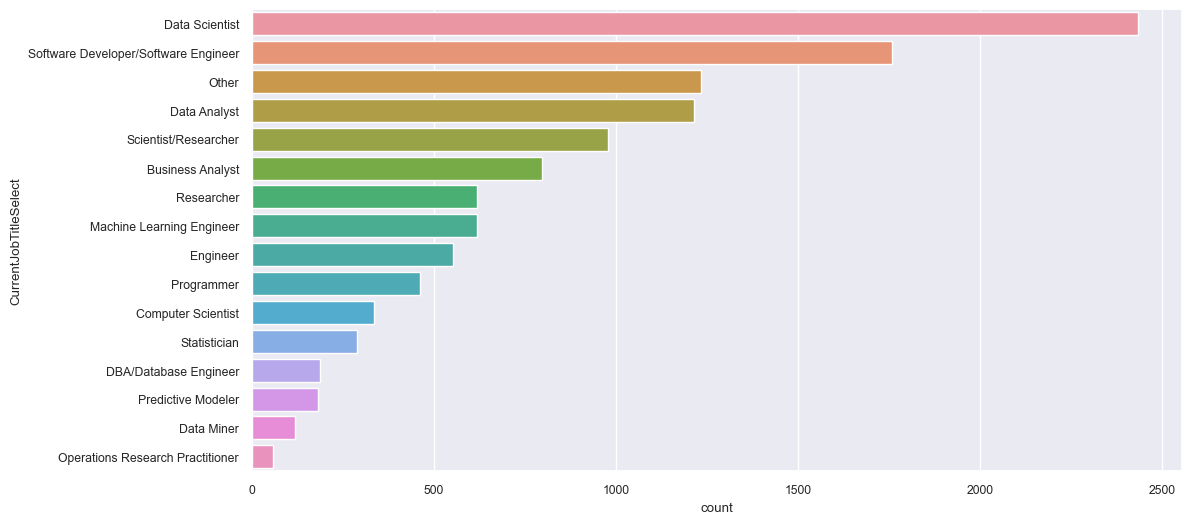

In [12]:
plt.figure(figsize=(12, 6))
sns.countplot(mca, y="CurrentJobTitleSelect", order=mca["CurrentJobTitleSelect"].value_counts().index)

In [13]:
# count() Method는 Nan 컬럼은 세지 않는다.
mca["CurrentJobTitleSelect"].count()

11830

In [14]:
# 컬럼 값이 Null(Nan)인 아이들만...
mca["CurrentJobTitleSelect"].isnull().sum()

4886

In [15]:
# 컬럼 수 세기
mca["CurrentJobTitleSelect"].notnull().count()

16716

In [16]:
mca["LanguageRecommendationSelect"].value_counts()

Python      6941
R           2643
SQL          385
C/C++/C#     307
Matlab       238
Java         138
Scala         94
SAS           88
Other         85
Julia         30
Stata         28
Haskell       17
F#             4
Name: LanguageRecommendationSelect, dtype: int64

In [17]:
data = mca[(mca["LanguageRecommendationSelect"] == "Python") | (mca["LanguageRecommendationSelect"] == "R")]
data.shape

(9584, 228)

In [18]:
mca[mca["CurrentJobTitleSelect"].notnull() & ((mca["LanguageRecommendationSelect"] == "Python") | (mca["LanguageRecommendationSelect"] == "R"))]["CurrentJobTitleSelect"].count()

7158

<Axes: xlabel='count', ylabel='CurrentJobTitleSelect'>

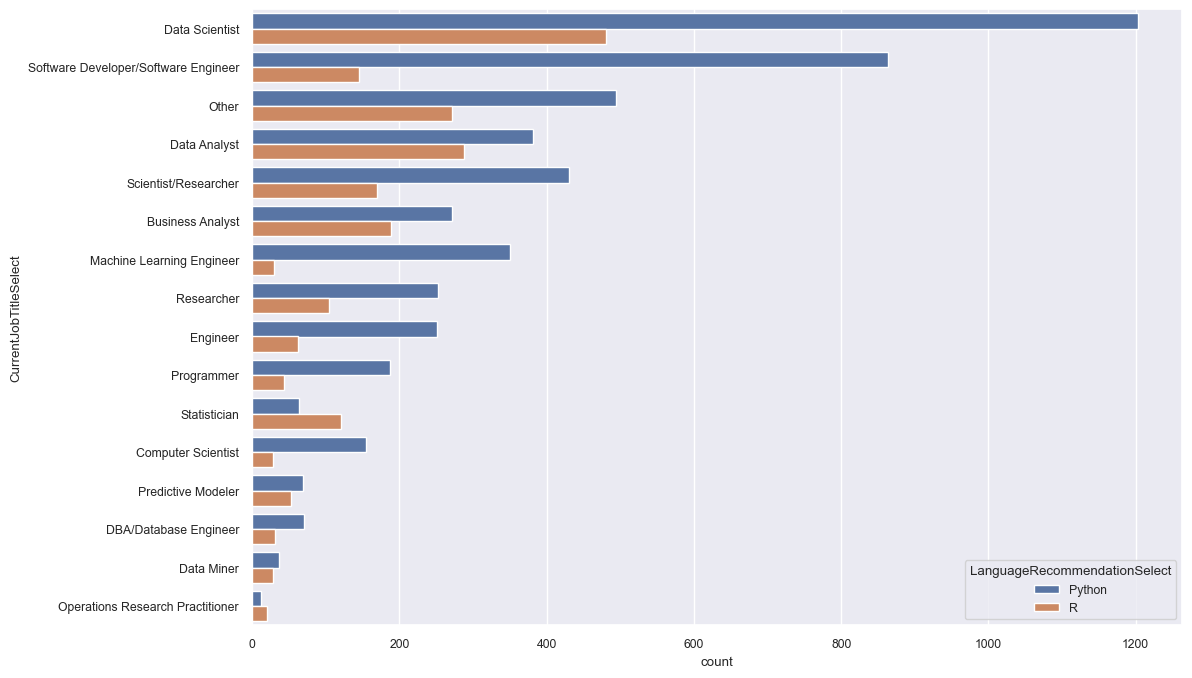

In [19]:
plt.figure(figsize=(12, 8))
sns.countplot(data,
              y="CurrentJobTitleSelect",
              hue="LanguageRecommendationSelect",
              order=data["CurrentJobTitleSelect"].value_counts().index)

In [20]:
data.pivot_table("EmploymentStatus", index=["CurrentJobTitleSelect"], columns=["LanguageRecommendationSelect"], aggfunc="count")

LanguageRecommendationSelect,Python,R
CurrentJobTitleSelect,,
Business Analyst,272,189
Computer Scientist,155,28
DBA/Database Engineer,71,31
Data Analyst,382,288
Data Miner,37,29
Data Scientist,1203,481
Engineer,251,62
Machine Learning Engineer,350,30
Operations Research Practitioner,12,20


In [21]:
data.groupby(["CurrentJobTitleSelect", "LanguageRecommendationSelect"])["CurrentJobTitleSelect"].count()

CurrentJobTitleSelect                 LanguageRecommendationSelect
Business Analyst                      Python                           272
                                      R                                189
Computer Scientist                    Python                           155
                                      R                                 28
DBA/Database Engineer                 Python                            71
                                      R                                 31
Data Analyst                          Python                           382
                                      R                                288
Data Miner                            Python                            37
                                      R                                 29
Data Scientist                        Python                          1203
                                      R                                481
Engineer                         

In [22]:
tool_count_df = pd.DataFrame(mca["MLToolNextYearSelect"].value_counts())
tool_count_df

,MLToolNextYearSelect
TensorFlow,2621
Python,1713
R,910
Spark / MLlib,755
Hadoop/Hive/Pig,417
Other,407
Amazon Machine Learning,392
Jupyter notebooks,358
I don't plan on learning a new tool/technology,341
Google Cloud Compute,296


In [23]:
tool_rate_df = pd.DataFrame(mca["MLToolNextYearSelect"].value_counts(normalize=True))
tool_rate_df

,MLToolNextYearSelect
TensorFlow,0.238316
Python,0.155756
R,0.082742
Spark / MLlib,0.068649
Hadoop/Hive/Pig,0.037916
Other,0.037007
Amazon Machine Learning,0.035643
Jupyter notebooks,0.032551
I don't plan on learning a new tool/technology,0.031006
Google Cloud Compute,0.026914


In [24]:
tool_df = pd.concat([tool_count_df, tool_rate_df], axis=1)
tool_df.columns = ["응답수", "비율"]
data = tool_df.head(20)
data

,응답수,비율
TensorFlow,2621,0.238316
Python,1713,0.155756
R,910,0.082742
Spark / MLlib,755,0.068649
Hadoop/Hive/Pig,417,0.037916
Other,407,0.037007
Amazon Machine Learning,392,0.035643
Jupyter notebooks,358,0.032551
I don't plan on learning a new tool/technology,341,0.031006
Google Cloud Compute,296,0.026914


<Axes: xlabel='응답수'>

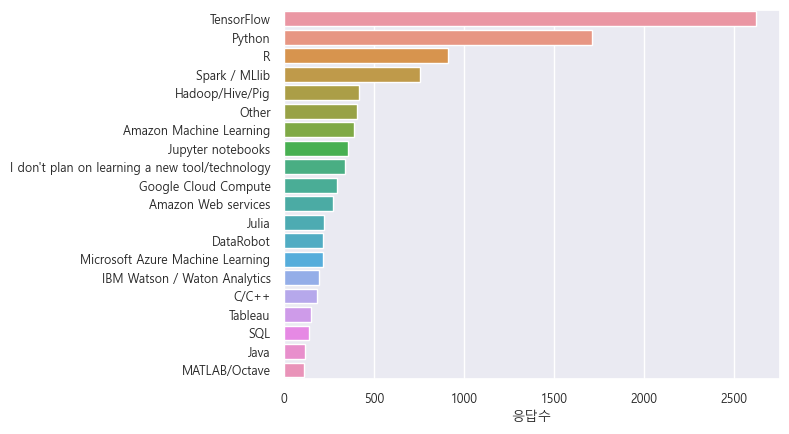

In [25]:
sns.set(font="Malgun Gothic", font_scale=0.8)
sns.barplot(data, y=data.index, x="응답수")

In [26]:
data =mca["MLMethodNextYearSelect"].value_counts().head(15)
data.values

array([4362, 1386,  680,  511,  493,  425,  364,  307,  269,  258,  230,
        220,  216,  195,  156], dtype=int64)

<Axes: >

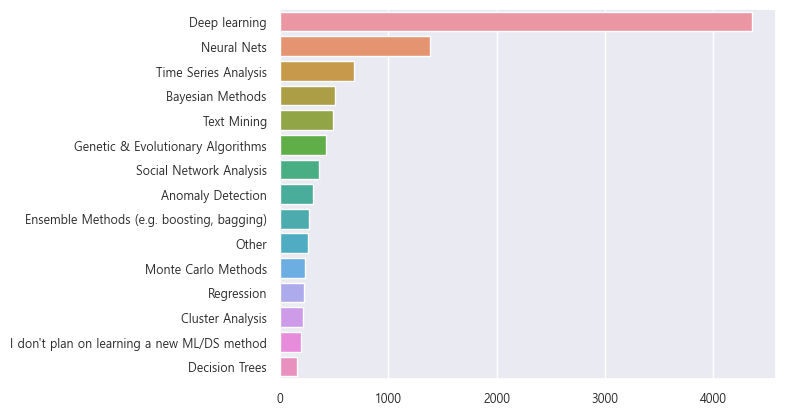

In [27]:
sns.barplot(y=data.index, x=data.values)

In [28]:
# pd.set_option("display.max_colwidth", None)
# pd.set_option("display.max_rows", None)
# pd.set_option("display.max_columns", None)

In [29]:
# platform_df = mca["LearningPlatformSelect"].str.split(",", expand=True).melt().drop("variable", axis=1).dropna()
# platform_df.columns = ["LearningPlatformName"]
# platform_df.head()

In [30]:
# platform_df["LearningPlatformName"].value_counts()

In [31]:
# mca["LearningPlatformSelect"].str.split(",", expand=True)

In [32]:
# mca["LearningPlatformSelect"].str.split(",", expand=True).melt(ignore_index=False).drop("variable", axis=1).loc[0].dropna()

In [33]:
# mca["LearningPlatformSelect"].str.split(",", expand=True).stack()

In [34]:
platform_df = mca["LearningPlatformSelect"].str.split(",", expand=True).stack().reset_index(level=1, drop=True)
data = platform_df.value_counts().head(15)
data

Kaggle                           6645
Online courses                   6042
Stack Overflow Q&A               5703
YouTube Videos                   5291
Personal Projects                4873
Blogs                            4828
Textbook                         4246
College/University               3397
Arxiv                            2418
Official documentation           2354
Conferences                      2217
Friends network                  1617
Tutoring/mentoring               1458
Podcasts                         1238
Non-Kaggle online communities    1169
dtype: int64

<Axes: >

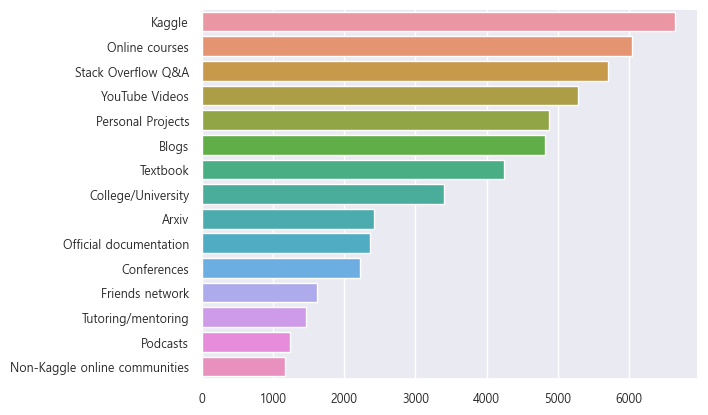

In [35]:
sns.barplot(y=data.index, x=data.values)

In [36]:
# pd.reset_option("display.max_colwidth")
# pd.reset_option("display.max_rows")
# pd.reset_option("display.max_columns")

In [37]:
usefulness_list = mca.columns[mca.columns.str.contains("LearningPlatformUsefulness")].tolist()
usefulness_list

['LearningPlatformUsefulnessArxiv',
 'LearningPlatformUsefulnessBlogs',
 'LearningPlatformUsefulnessCollege',
 'LearningPlatformUsefulnessCompany',
 'LearningPlatformUsefulnessConferences',
 'LearningPlatformUsefulnessFriends',
 'LearningPlatformUsefulnessKaggle',
 'LearningPlatformUsefulnessNewsletters',
 'LearningPlatformUsefulnessCommunities',
 'LearningPlatformUsefulnessDocumentation',
 'LearningPlatformUsefulnessCourses',
 'LearningPlatformUsefulnessProjects',
 'LearningPlatformUsefulnessPodcasts',
 'LearningPlatformUsefulnessSO',
 'LearningPlatformUsefulnessTextbook',
 'LearningPlatformUsefulnessTradeBook',
 'LearningPlatformUsefulnessTutoring',
 'LearningPlatformUsefulnessYouTube']

In [38]:
# mca["LearningPlatformUsefulnessArxiv"].value_counts(normalize=True)

In [39]:
usefulness_rate_dict = {}
for usefulness in usefulness_list:
    temp = mca[usefulness].value_counts(normalize=True)
    usefulness_rate_dict[usefulness[len("LearningPlatformUsefulness"):]] = temp

for k, v in usefulness_rate_dict.items():
    print (k, v, sep="\n", end="\n\n")


Arxiv
Very useful        0.550397
Somewhat useful    0.434128
Not Useful         0.015475
Name: LearningPlatformUsefulnessArxiv, dtype: float64

Blogs
Somewhat useful    0.504932
Very useful        0.485624
Not Useful         0.009444
Name: LearningPlatformUsefulnessBlogs, dtype: float64

College
Very useful        0.551652
Somewhat useful    0.418279
Not Useful         0.030068
Name: LearningPlatformUsefulnessCollege, dtype: float64

Company
Somewhat useful    0.511723
Very useful        0.446483
Not Useful         0.041794
Name: LearningPlatformUsefulnessCompany, dtype: float64

Conferences
Somewhat useful    0.598075
Very useful        0.347388
Not Useful         0.054537
Name: LearningPlatformUsefulnessConferences, dtype: float64

Friends
Somewhat useful    0.489564
Very useful        0.478178
Not Useful         0.032258
Name: LearningPlatformUsefulnessFriends, dtype: float64

Kaggle
Very useful        0.619171
Somewhat useful    0.372323
Not Useful         0.008507
Name: LearningP

In [40]:
usefulness_rate_df = pd.DataFrame(usefulness_rate_dict).transpose().sort_values("Very useful", ascending=False).sort_index(axis=1, ascending=False)
usefulness_rate_df.head()

,Very useful,Somewhat useful,Not Useful
Projects,0.744681,0.247184,0.008135
Courses,0.700100,0.292056,0.007844
SO,0.626241,0.362411,0.011348
Kaggle,0.619171,0.372323,0.008507
Tutoring,0.578541,0.399018,0.022440


<Axes: >

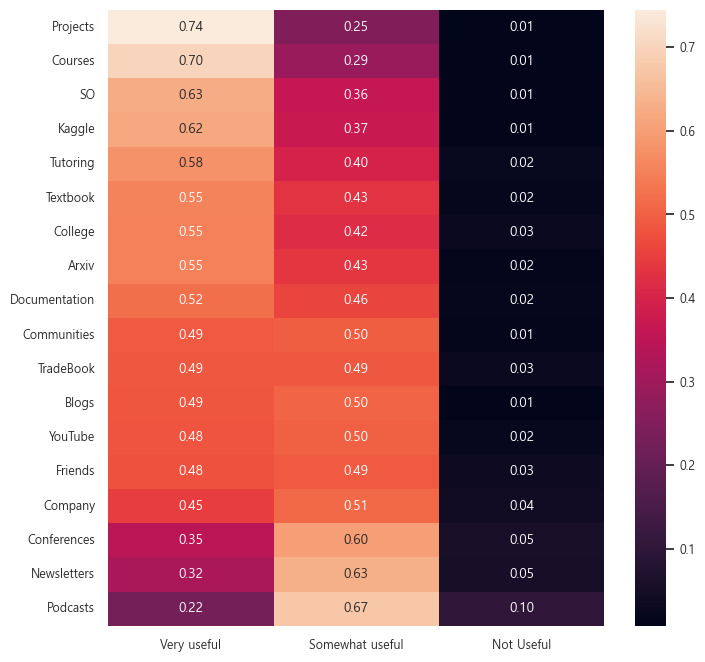

In [41]:
plt.figure(figsize=(8, 8))
sns.heatmap(usefulness_rate_df, annot=True, fmt=".2f")

<Axes: title={'center': 'Usefulness of Learning Platforms'}>

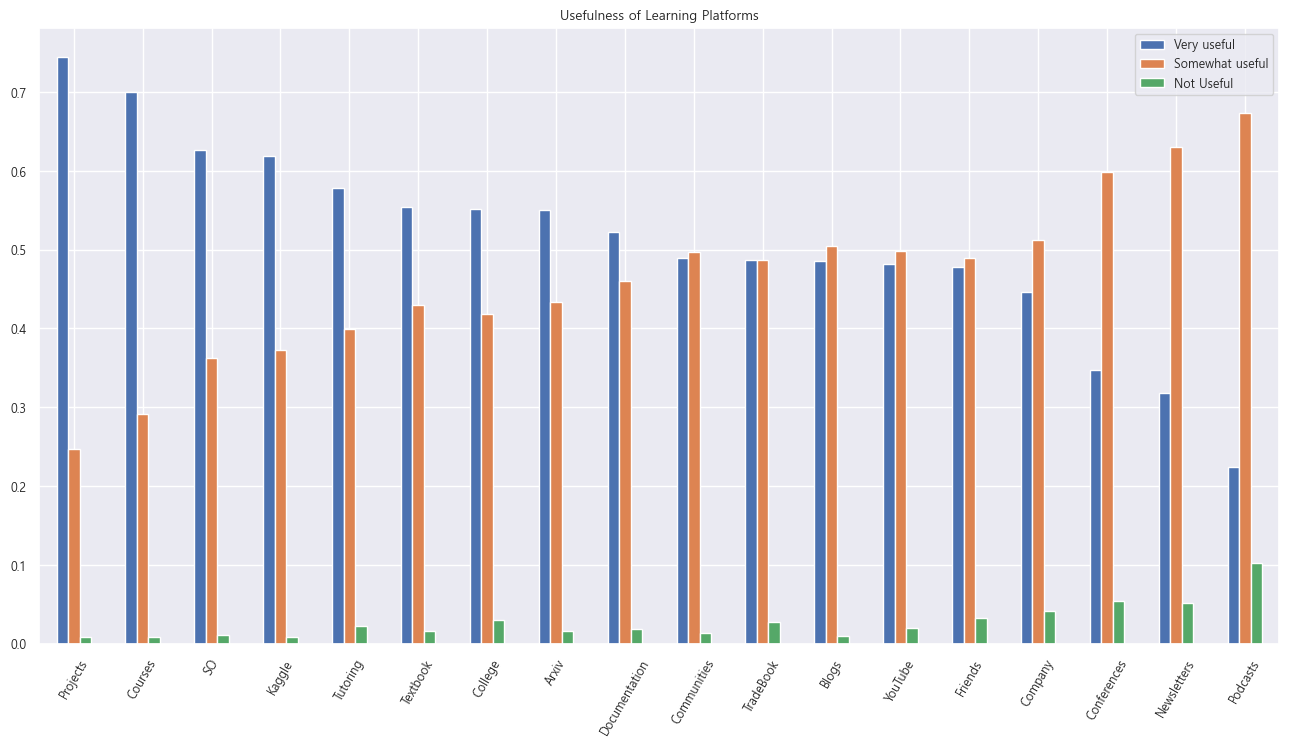

In [42]:
plot = usefulness_rate_df.plot.bar(figsize=(16, 8), title="Usefulness of Learning Platforms")
plt.xticks(rotation=60)
plot

In [43]:
category_list = list(mca.columns[mca.columns.str.contains("LearningCategory", regex=True)])
category_list

['LearningCategorySelftTaught',
 'LearningCategoryOnlineCourses',
 'LearningCategoryWork',
 'LearningCategoryUniversity',
 'LearningCategoryKaggle',
 'LearningCategoryOther']

In [44]:
category_mean_dict = {}
for category in category_list:
    temp = mca[category].mean()
    category_mean_dict[category[len("LearningCategory"):]] = temp
category_series = pd.Series(category_mean_dict)
category_series

SelftTaught      33.366771
OnlineCourses    27.375514
Work             15.217593
University       16.988607
Kaggle            5.531434
Other             1.795940
dtype: float64

<Axes: >

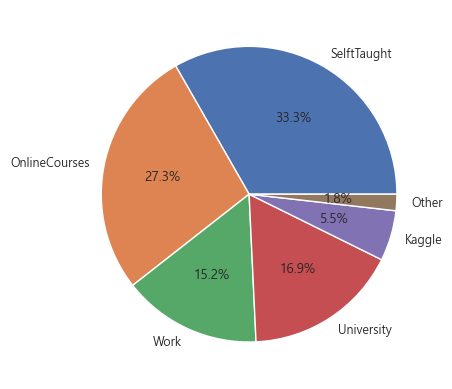

In [45]:
category_series.plot.pie(autopct="%.1f%%")

In [46]:
mcq[mcq["Column"].str.contains("HardwarePersonalProjectsSelect")].iloc[0, 1]

'Which computing hardware do you use for your personal ML/DS projects? - Selected Choice'

In [47]:
mca[mca["HardwarePersonalProjectsSelect"].notnull()]["HardwarePersonalProjectsSelect"].shape

(4206,)

In [ ]:
# mca["HardwarePersonalProjectsSelect"].str.split(",", expand=True).melt(ignore_index=False).drop("variable", axis=1).dropna()

In [62]:
hardware_series = mca["HardwarePersonalProjectsSelect"] \
    .str.split(",", expand=True) \
    .stack() \
    .reset_index(level=1, drop=True) \
    .value_counts()

hardware_series.name = "hardware"

pd.DataFrame(hardware_series)

,hardware
Basic laptop (Macbook),2246
Laptop + Cloud service (AWS,669
Azure,669
GCE ...),669
Gaming Laptop (Laptop + CUDA capable GPU),641
Traditional Workstation,527
Laptop or Workstation and local IT supported servers,445
GPU accelerated Workstation,416
Workstation + Cloud service,174
Other,147


In [75]:
mca.groupby(["TimeSpentStudying", "EmploymentStatus"])["EmploymentStatus"].count()

TimeSpentStudying  EmploymentStatus                                    
0 - 1 hour         Employed full-time                                      313
                   Employed part-time                                       39
                   I prefer not to say                                      34
                   Independent contractor, freelancer, or self-employed     42
                   Not employed, and not looking for work                  104
                   Not employed, but looking for work                      207
11 - 39 hours      Employed full-time                                      139
                   Employed part-time                                       16
                   I prefer not to say                                      51
                   Independent contractor, freelancer, or self-employed     19
                   Not employed, and not looking for work                  157
                   Not employed, but looking for work      

<Axes: xlabel='count', ylabel='TimeSpentStudying'>

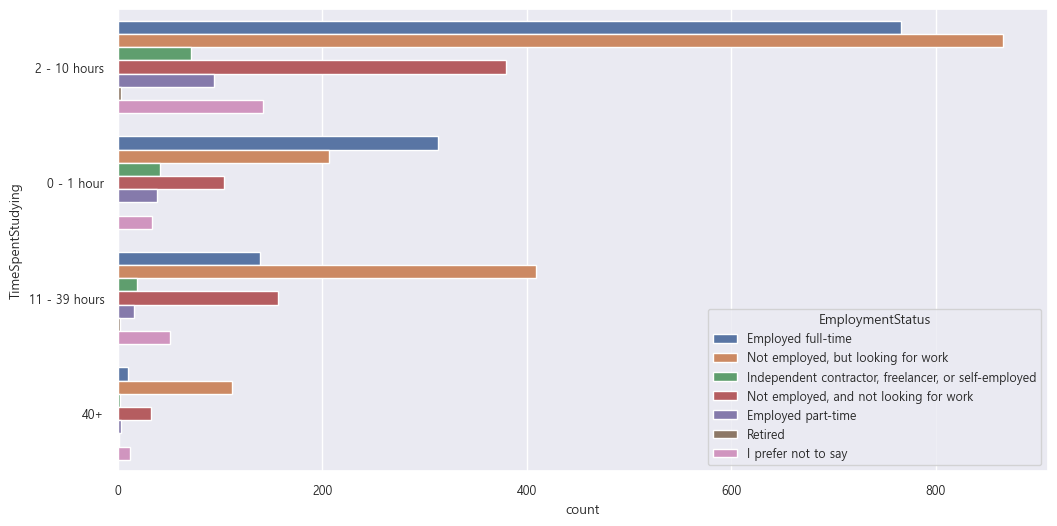

In [82]:
plt.figure(figsize=(12, 6))
sns.countplot(mca,
              y="TimeSpentStudying",
              hue="EmploymentStatus")

In [83]:
mca["EmploymentStatus"].value_counts()

Employed full-time                                      10897
Not employed, but looking for work                       2110
Independent contractor, freelancer, or self-employed     1330
Not employed, and not looking for work                    924
Employed part-time                                        917
I prefer not to say                                       420
Retired                                                   118
Name: EmploymentStatus, dtype: int64

In [86]:
fulltime_df = mca[mca["EmploymentStatus"] == "Employed full-time"]
fulltime_df.shape

(10897, 228)

In [87]:
parttime_df = mca[mca["EmploymentStatus"] == "Not employed, but looking for work"]
parttime_df.shape

(2110, 228)

<Axes: xlabel='TimeSpentStudying', ylabel='count'>

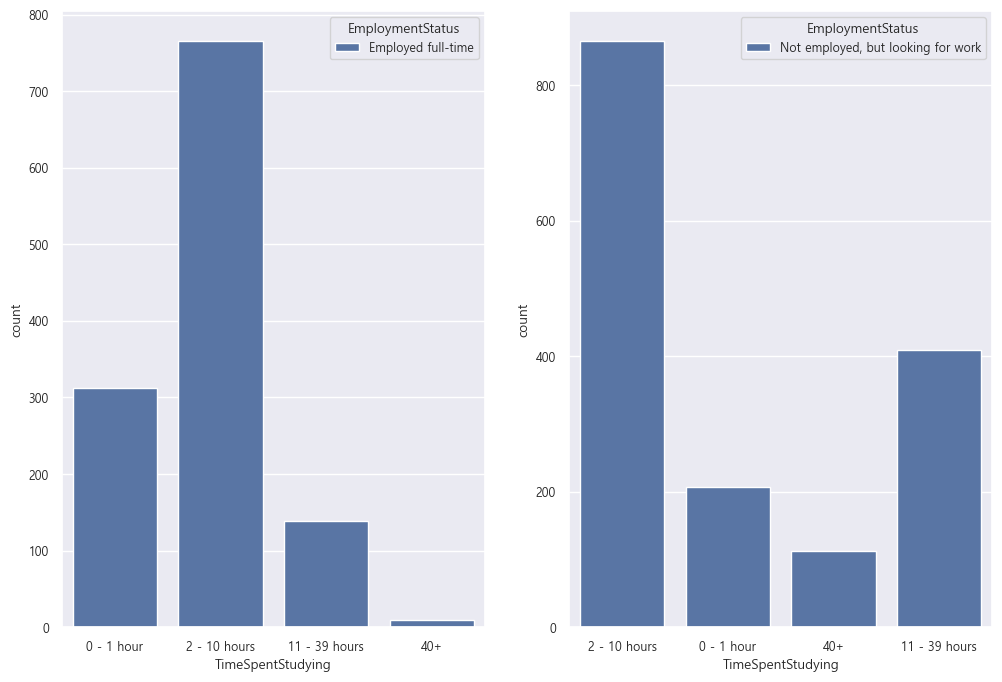

In [96]:
figure, (ax1, ax2) = plt.subplots(ncols=2)
figure.set_size_inches(12, 8)

sns.countplot(fulltime_df,
              x="TimeSpentStudying",
              hue="EmploymentStatus",
              ax=ax1)

sns.countplot(parttime_df,
              x="TimeSpentStudying",
              hue="EmploymentStatus",
              ax=ax2)